# 分類モデルを開発してみよう

# 1. 事前準備

## 必要なライブラリのインポート

In [1]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from scipy.special import softmax

# 2. Layer クラスの開発

## Layer クラス

In [2]:
class Layer:
    """全結合層
    Attributes:
        W (ndarray): 重み `(prev_layer_size, layer_size)`
        b (ndarray): バイアス `(layer_size, )`
        activation_fn (callable): 活性化関数
    """

    def __init__(self, prev_layer_size, layer_size, activation_fn):
        """
        Args:
            prev_layer_size (int): 前のレイヤのノード数
            layer_size (int): このレイヤのノード数
            activation_fn (callable): 活性化関数
        """
        # 乱数のシードを設定
        np.random.seed(1)
        
        # 重みを Xavier initialization で初期化
        self.W = np.random.randn(prev_layer_size, layer_size) / np.sqrt(prev_layer_size)
        
        # バイアスを0で初期化
        self.b = np.zeros((layer_size))
        
        # 活性化関数を設定
        self.activation_fn = activation_fn

    def forward(self, A_prev):
        """
        順伝播を行う。
        Args:
            A_prev (ndarray): 前のレイヤの出力 `(batch_size, prev_layer_size)`
        Returns:
            A (ndarray): このレイヤの出力 `(batch_size, layer_size)`
        """
        # Z と A を計算
        Z = np.dot(A_prev, self.W) + self.b
        A = self.activation_fn(Z)

        # A を返す
        return A

# 3. 順伝播を体験しよう

## レイヤ0→レイヤ1

### バッチ版の入力データを生成

In [3]:
np.random.seed(1) # 乱数のシードを設定
batch_size = 2 # バッチサイズ
input_layer_size = 2 # 入力層のノードの数
A0 = np.random.randn(batch_size, input_layer_size) # (batch_size, input_layer_size) の型で A0 を乱数で生成
print('レイヤ0の出力の型 =', A0.shape) # 入力層の出力の型を表示
print('レイヤ0の出力 =', A0) # 入力層の出力を表示

レイヤ0の出力の型 = (2, 2)
レイヤ0の出力 = [[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]


### ReLU関数を定義

In [4]:
relu_fn = lambda Z: np.maximum(Z, 0)

### レイヤ1を生成

In [5]:
layer1 = Layer(2, 3, relu_fn) # レイヤ1の生成

print('レイヤ1の重みの型 =', layer1.W.shape)
print('レイヤ1の重み (W1) =\n', layer1.W)
print('')
print('レイヤ1のバイアスの型 =', layer1.b.shape)
print('レイヤ1のバイアス (b1) =', layer1.b)

レイヤ1の重みの型 = (2, 3)
レイヤ1の重み (W1) =
 [[ 1.14858562 -0.43257711 -0.37347383]
 [-0.75870339  0.6119356  -1.62743362]]

レイヤ1のバイアスの型 = (3,)
レイヤ1のバイアス (b1) = [0. 0. 0.]


### 順伝播

In [6]:
A1 = layer1.forward(A0) # レイヤ0の出力をレイヤ1に順伝播

print('レイヤ1の出力の型 =', A1.shape)
print('レイヤ1の出力 (A1) =\n', A1)

レイヤ1の出力の型 = (2, 3)
レイヤ1の出力 (A1) =
 [[2.32984139 0.         0.38894247]
 [0.20741445 0.         1.94344353]]


## レイヤ1→レイヤ2

### レイヤ2を生成

In [7]:
layer2 = Layer(3, 4, relu_fn) # レイヤ2の生成

print('レイヤ2の重みの型 =', layer2.W.shape)
print('レイヤ2の重み (W2) =\n', layer2.W)
print('')
print('レイヤ2のバイアスの型 =', layer2.b.shape)
print('レイヤ2のバイアス (b2) =', layer2.b)

レイヤ2の重みの型 = (3, 4)
レイヤ2の重み (W2) =
 [[ 0.93781623 -0.35319773 -0.3049401  -0.61947872]
 [ 0.49964333 -1.32879399  1.00736754 -0.43948301]
 [ 0.18419731 -0.14397405  0.84414841 -1.18942279]]

レイヤ2のバイアスの型 = (4,)
レイヤ2のバイアス (b2) = [0. 0. 0. 0.]


### 順伝播

In [8]:
A2 = layer2.forward(A1) # レイヤ1の出力をレイヤ2に順伝播
print('レイヤ2の出力の型 =', A2.shape)
print('レイヤ2の出力 (a2) =\n', A2)

レイヤ2の出力の型 = (2, 4)
レイヤ2の出力 (a2) =
 [[2.25660524 0.         0.         0.        ]
 [0.5524937  0.         1.57730579 0.        ]]


## レイヤ2→レイヤ3

### Softmax 関数を定義

In [9]:
softmax_fn = lambda Z: softmax(Z, axis=1)

### レイヤ3を生成

In [10]:
layer3 = Layer(4, 3, softmax_fn) # レイヤ3の生成

print('レイヤ3の重みの型 =', layer3.W.shape)
print('レイヤ3の重み (W3) =\n', layer3.W)
print('')
print('レイヤ3のバイアスの型 =', layer3.b.shape)
print('レイヤ3のバイアス (b3) =\n', layer3.b)

レイヤ3の重みの型 = (4, 3)
レイヤ3の重み (W3) =
 [[ 0.81217268 -0.30587821 -0.26408588]
 [-0.53648431  0.43270381 -1.15076935]
 [ 0.87240588 -0.38060345  0.15951955]
 [-0.12468519  0.73105397 -1.03007035]]

レイヤ3のバイアスの型 = (3,)
レイヤ3のバイアス (b3) =
 [0. 0. 0.]


### 順伝播

In [11]:
A3 = layer3.forward(A2)
print('レイヤ3の出力の型 =', A3.shape)
print('レイヤ3の出力 (a3) =\n', A3)

レイヤ3の出力の型 = (2, 3)
レイヤ3の出力 (a3) =
 [[0.85589266 0.06865854 0.0754488 ]
 [0.79748189 0.05958264 0.14293548]]


# 4. SimpleClassifier クラスの開発

## SimpleClassifier クラス

In [12]:
class SimpleClassifier:
    """　シンプルな分類モデル
    Attributes:
        layers (list): 隠れ層のリスト
    """

    def __init__(self, input_layer_size, output_layer_size, hidden_layers_sizes, activation_fn=relu_fn):
        """
        Args:
            input_layer_size (int): 入力層のノードの数
            output_layer_size (int): 出力層のノードの数
            hidden_layers_sizes (list): 隠れ層のノードの数を持つリスト。インデックス0: レイヤ1のノードの数、インデックス1: レイヤ2のノードの数　・・・・
            activation_fn (callable): 隠れ層に適用する活性化関数
        """

        # 入力層と隠れ層のノードの数をリストに格納。*hidden_layers_sizes　の　「*」 によってリストを展開している 
        layer_sizes = [input_layer_size, *hidden_layers_sizes]
        
        # 隠れ層をまとめて生成し、self.layers に格納
        self.layers = [
            Layer(layer_sizes[i], layer_sizes[i + 1], activation_fn) 
            for i in range(len(layer_sizes) - 1)]
        
        # 出力層を生成。活性化関数は Softmax 関数固定。
        output_layer= Layer(layer_sizes[-1], output_layer_size, softmax_fn)
        
        # 出力層を self.layers に格納
        self.layers.append(output_layer)

    def forward(self, A0):
        """
        順伝播を行い出力層の出力を返す
        Args:
            A0 (ndarray): 入力層の出力 `(batch_size, input_layer_size)`
        Returns:
            Y_hat (ndarray): 出力層の出力 `(batch_size, output_layer_size)`
        """
        # 順伝播
        A = A0
        for layer in self.layers:
            A = layer.forward(A)
        
        # 出力層の出力を返す
        Y_hat = A
        return Y_hat

    def predict(self, X):
        """
        推論し、推論結果を返す
        Args:
            X (ndarray): 入力データ `(batch_size, input_layer_size)`
        Returns:
            Y_hat (ndarray): 推論結果 `(batch_size, output_layer_size)`
        """
        Y_hat = self.forward(X)
        return Y_hat

    def evaluate_accuracy(self, X, Y):
        """
        正解率を計算し返す
        Args:
            X (ndarray): 対象のデータセット `(batch_size, input_layer_size)`
            Y (ndarray): One-Hot の正解データ `(batch_size, output_layer_size)`
        Returns:
            accuracy (float): 正解率
        """
        # 推論結果が最大となるクラスを取得
        predict = np.argmax(self.predict(X), axis=1)
        
        # 正解のクラスを取得
        actual = np.argmax(Y, axis=1)
        
        # 分類されたクラスと正解クラスが一致する数を計算
        num_corrects = len(np.where(predict == actual)[0])
        
        # 正解率(= 正解の数/データセットのサイズ) を計算して返す
        accuracy = num_corrects / len(X)
        return accuracy

# 5. 画像分類を体験しよう

## MNIST データセットの取得

In [13]:
X_train, Y_train = mnist.train_images(), mnist.train_labels() # 学習データと正解データを取得
X_test, Y_test = mnist.test_images(), mnist.test_labels() # テストデータと正解データを取得
X_train, X_test = X_train/255.0, X_test/255.0 # [0-1] のスケールに変換

## MNIST データセットの型の確認

In [14]:
print('X_train.shape =', X_train.shape)
print('Y_train.shape =', Y_train.shape)
print('X_test.shape =', X_test.shape)
print('Y_test.shape =', Y_test.shape)

X_train.shape = (60000, 28, 28)
Y_train.shape = (60000,)
X_test.shape = (10000, 28, 28)
Y_test.shape = (10000,)


## 正解クラスと画像の表示

7


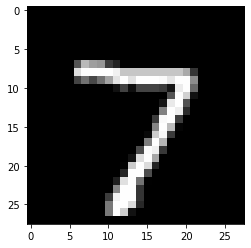

In [15]:
print(Y_test[0]) # 正解クラスの表示
plt.imshow(X_test[0], cmap=plt.cm.gray) # 画像の表示

## データのフラット化と One-Hot エンコーディング

In [16]:
# データをフラットにする
X_train_flat, X_test_flat = X_train.reshape(-1, 28 * 28), X_test.reshape(-1, 28 * 28)

# One-Hot エンコーディング
num_classes = 10 # クラスの数
Y_train_ohe = np.eye(num_classes)[Y_train] # ファンシーインデックスを利用
Y_test_ohe = np.eye(num_classes)[Y_test]

## 変換後の確認

In [17]:
print('X_train_flat.shape =', X_train_flat.shape)
print('Y_train_ohe.shape =', Y_train_ohe.shape)
print('X_test_flat.shape =', X_test_flat.shape)
print('Y_test_ohe.shape =', Y_test_ohe.shape)

# サンプルで確認
print(Y_test_ohe[0])

X_train_flat.shape = (60000, 784)
Y_train_ohe.shape = (60000, 10)
X_test_flat.shape = (10000, 784)
Y_test_ohe.shape = (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## MNIST の分類モデルの生成

In [18]:
mnist_classifier = SimpleClassifier(X_test_flat.shape[1], num_classes, [64, 32])

## 推論と分類

In [19]:
Y_hat = mnist_classifier.predict(X_test_flat[0:1]) # テストデータの最初のデータを推論
print('推論結果:\n', Y_hat[0]) # 推論結果を表示
print('分類結果:',np.argmax(Y_hat[0])) # 分類結果を表示

推論結果:
 [0.10292778 0.06061532 0.1338951  0.10314735 0.10864224 0.09773565
 0.11141222 0.08672163 0.09830012 0.09660259]
分類結果: 2


## 全テストデータの分類と正解率の算出

In [20]:
accuracy = mnist_classifier.evaluate_accuracy(X_test_flat, Y_test_ohe)
print('正解率: {:.2f}%'.format(accuracy * 100))

正解率: 8.63%


# 6. 活性化関数によるモデルの表現力の変化を体験しよう

## 3つの活性化関数で実験
① $x$　② $0.5x + 1$　③ ReLU

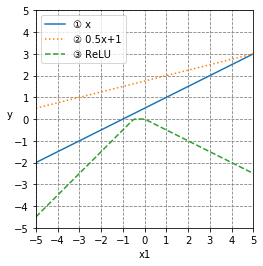

In [21]:
# ノード数2のレイヤ1とノード数1のレイヤ2（出力層）のみのモデルを生成
classifier= SimpleClassifier(2, 1, [2])

#  レイヤ1 の重みとバイアスを変更
classifier.layers[0].W = np.array([[-1., 1.0], [-0.5, -1]])
classifier.layers[0].b = np.array([0.0, 1])

# レイヤ2 の重みとバイアスを変更
classifier.layers[1].W = np.array([[-1], [-0.5]])
classifier.layers[1].b = np.array([0])

# レイヤ2の活性化関数を softmax から 線形関数に変更
classifier.layers[1].activation_fn =  lambda x: x

# 対象の関数
def f(x, activation_fn):
    # x2 = 1 で固定した (x1, x2) を生成 
    A0 = x.reshape(-1, 1)
    A0 = np.insert(A0, 1, np.ones([100]), axis=1)
    
    # レイヤ1の活性化関数を変更
    classifier.layers[0].activation_fn = activation_fn
    
    # 推論
    Y_hat = classifier.predict(A0)

    return Y_hat

# x1の値を生成
x1 = np.linspace(-5, 5, 100)

# y = x の関数の場合
y_linear = f(x1, lambda x: x )

# y = 0.5x - 1 の関数の場合
y_affine = f(x1, lambda x: 0.5 * x - 1)

# ReLU 関数の場合
y_relu = f(x1, relu_fn)

# グラフの表示
range_min = -5
range_max = 5
plt.axes().set_aspect('equal')
plt.xticks(np.arange(range_min, range_max + 1, 1))
plt.yticks(np.arange(range_min, range_max + 1, 1))
plt.ylim([range_min, range_max])
plt.xlim([range_min, range_max])  
plt.grid(which='major', color='gray', linestyle='dashed')
plt.xlabel('x1')
plt.ylabel('y',  rotation=0)
plt.plot(x1, y_linear, label='① x',  linestyle='solid')
plt.plot(x1, y_affine, label='② 0.5x+1', linestyle='dotted')
plt.plot(x1, y_relu, label='③ ReLU', linestyle='dashed')
plt.legend()
plt.show()

# 7. 学習を体験しよう

## ユーティリティ関数の準備

### 交差エントロピー誤差

In [30]:
def cross_entropy_loss(Y_hat, Y):
    batch_size = Y_hat.shape[0]
    return -np.sum(Y * np.log(Y_hat + 1e-7)) / batch_size

### Softmax with Loss の導関数

In [23]:
def d_softmax_with_loss_fn(Y_hat, Y):
    batch_size = Y_hat.shape[0]
    return (Y_hat - Y) / batch_size

### ReLU 関数の導関数

In [24]:
def d_relu_fn(Z):
    return np.where(Z > 0, 1, 0)

### 出力層用のダミーの導関数

In [25]:
def d_output_fn(dJ_dZ):
    return 1

## Layer の改修

In [26]:
class Layer:
    """全結合層
    Attributes:
        W (ndarray): 重み `(prev_layer_size, layer_size)`
        b (ndarray): バイアス `(layer_size, )`
        activation_fn (callable): 活性化関数
        d_activation_fn (callable): 活性化関数の導関数
        A (ndarray): このレイヤの出力 `(batch_size, layer_size)`
        A_prev (ndarray): 前のレイヤの出力 `(batch_size, prev_layer_size)`
        dJ_dW (ndarray): 重みについてのコストの偏微分係数 `(prev_layer_size, layer_size)`
        dJ_db (ndarray): バイアスについてのコストの偏微分係数 `(layer_size, )`
    """

    def __init__(self, prev_layer_size, layer_size, activation_fn, d_activation_fn):
        """
        Args:
            prev_layer_size (int): 前のレイヤのノード数
            layer_size (int): このレイヤのノード数
            activation_fn (callable): 活性化関数
            d_activation_fn (callable): 活性化関数の導関数
        """
        # 乱数のシードを設定
        np.random.seed(1)
        
        # 重みを Xavier initialization で初期化
        self.W = np.random.randn(prev_layer_size, layer_size) / np.sqrt(prev_layer_size)
        
        # バイアスを0で初期化
        self.b = np.zeros((layer_size))
        
        # 活性化関数を設定
        self.activation_fn = activation_fn
        
        # 活性化関数の導関数を設定
        self.d_activation_fn = d_activation_fn 

    def forward(self, A_prev):
        """
        順伝播を行う。
        Args:
            A_prev (ndarray): 前のレイヤの出力 `(batch_size, prev_layer_size)`
        Returns:
            A (ndarray): このレイヤの出力 `(batch_size, layer_size)`
        """
        # Z と A を計算
        Z = np.dot(A_prev, self.W) + self.b
        A = self.activation_fn(Z)
        
        # 誤差逆伝播用にこのレイヤの Z と前のレイヤの A をインスタンス変数にセット
        self.Z = Z
        self.A_prev = A_prev

        # A を返す
        return A

    def backward(self, dJ_dA):
        """
        誤差逆伝播を行う。
        Args:
            dJ_dA (ndarray): このレイヤの出力 A についてのコストの偏微分係数 `(batch_size, layer_size)`
        Returns:
            dJ_dA_prev (ndarray): 前のレイヤの出力 A についてのコストの偏微分係数 `(batch_size, prev_layer_size)`
        """

        # このレイヤの Z についてのコストの偏微分係数を計算
        # 出力層の場合は、dJ_dA　が dJ_dZ 相当のため、self.d_activation_fn(self.Z) がダミーで 1 を返す
        dJ_dZ = dJ_dA * self.d_activation_fn(self.Z) # (batch_size, layer_size)
        
        # 重みとバイアスについてのコストの偏微分係数を計算してインスタンス変数にセット
        self.dJ_dW = np.dot(self.A_prev.T, dJ_dZ) # (prev_layer_size, layer_size)
        self.dJ_db = np.dot(np.ones(dJ_dA.shape[0]), dJ_dZ) # (layer_size, )
        
        # 前のレイヤの　A についてのコストの偏微分係数を計算して誤差逆伝播する
        dJ_dA_prev = np.dot(dJ_dZ, self.W.T) # (batch_size, prev_layer_size)
        return dJ_dA_prev
    
    def update_params(self, learning_rate):
        """
        重みとバイアスを更新する。
        Args:
            learning_rate (float): 学習率
        """
        self.W -= learning_rate * self.dJ_dW
        self.b -= learning_rate * self.dJ_db

## SimpleClassifier の改修

In [27]:
class SimpleClassifier:
    """　シンプルな分類モデル
    Attributes:
        layers (list): 隠れ層のリスト
        costs (ndarray): エポックごとのコスト
        accuracies (ndarray): エポックごとの正解率
    """

    def __init__(self, input_layer_size, output_layer_size, hidden_layers_sizes, activation_fn, d_activation_fn):
        """
        Args:
            input_layer_size (int): 入力層のノードの数
            output_layer_size (int): 出力層のノードの数
            hidden_layers_sizes (list): 隠れ層のノードの数を持つリスト。インデックス0: レイヤ1のノードの数、インデックス1: レイヤ2のノードの数　・・・・
            activation_fn (callable): 隠れ層に適用する活性化関数
            d_activation_fn (callable): 隠れ層に適用する活性化関数の導関数
        """

        # 入力層と隠れ層のノードの数をリストに格納。*hidden_layers_sizes　の　「*」 によってリストを展開している 
        layer_sizes = [input_layer_size, *hidden_layers_sizes]
        
        # 隠れ層をまとめて生成し、self.layers に格納
        self.layers = [
            Layer(layer_sizes[i], layer_sizes[i + 1], activation_fn, d_activation_fn) 
            for i in range(len(layer_sizes) - 1)]
        
        # 出力層を生成。活性化関数は Softmax 関数固定。活性化関数の導関数はスカラーの1を返すダミーの関数。 
        output_layer = Layer(layer_sizes[-1], output_layer_size, softmax_fn, d_output_fn)
        
        # 出力層を self.layers に格納
        self.layers.append(output_layer)

    def forward(self, A0):
        """
        順伝播を行い出力層の出力を返す
        Args:
            A0 (ndarray): 入力層の出力 `(batch_size, input_layer_size)`
        Returns:
            Y_hat (ndarray): 出力層の出力 `(batch_size, output_layer_size)`
        """
        # 順伝播
        A = A0
        for layer in self.layers:
            A = layer.forward(A)
        
        # 出力層の出力を返す
        Y_hat = A
        return Y_hat

    def predict(self, X):
        """
        推論し、推論結果を返す
        Args:
            X (ndarray): 入力データ `(batch_size, input_layer_size)`
        Returns:
            Y_hat (ndarray): 推論結果 `(batch_size, output_layer_size)`
        """
        Y_hat = self.forward(X)
        return Y_hat

    def evaluate_accuracy(self, X, Y):
        """
        正解率を計算し、正解率を返す
        Args:
            X (ndarray): 対象のデータセット `(batch_size, input_layer_size)`
            Y (ndarray): One-Hot の正解データ `(batch_size, output_layer_size)`
        Returns:
            accuracy (float): 正解率
        """
        # 推論結果が最大となるクラスを取得
        predict = np.argmax(self.predict(X), axis=1)
        
        # 正解のクラスを取得
        actual = np.argmax(Y, axis=1)
        
        # 分類されたクラスと正解クラスが一致する数を計算
        num_corrects = len(np.where(predict == actual)[0])
        
        # 正解率(= 正解の数/データセットのサイズ) を計算して返す
        accuracy = num_corrects / len(X)
        return accuracy
    
    def backward(self, dJ_dZ):
        """
        誤差逆伝播を行い、入力層の出力についてのコストの偏微分係数を返す
        Args:
            dJ_dZ (ndarray): 出力層の Z についてのコストの偏微分係数 `(batch_size, output_layer_size)`
        Returns:
            dJ_dA (ndarray): 入力層の出力についてのコストの偏微分係数 `(batch_size, input_layer_size)`
        """
        dJ_dA = dJ_dZ
        for layer in reversed(self.layers):
            dJ_dA = layer.backward(dJ_dA)
        return dJ_dA

    def update_params(self, learning_rate):
        """
        隠れ層と出力層の重みとバイアスを更新する
        Args:
            learning_rate (float): 学習率
        """
        for layer in self.layers:
            layer.update_params(learning_rate)
    
    def train(self, X_train, Y_train, X_test, Y_test, mini_batch_size, num_epochs, learning_rate):
        """
        学習を行う
        Args:
            X_train (ndarray): 学習データ `(学習データのサイズ, input_layer_size)`
            Y_train (ndarray): 正解データ `(学習データのサイズ, output_layer_size)`
            X_test (ndarray): テストデータ `(テストデータのサイズ, input_layer_size)`
            Y_test (ndarray): テストデータの正解データ `(テストデータのサイズ, output_layer_size)`
            mini_batch_size (int): ミニバッチサイズ
            num_epochs　(int) : エポック数
            learning_rate (float) : 学習率
        """
        # エポックごとのミニバッチの数
        num_mini_batches_per_epoch = (X_train.shape[0] - 1) // mini_batch_size + 1

        # コストと正解率用のリスト
        costs, accuracies = [], []
        
        # エポックのループ
        for epoch in range(num_epochs):
            
            # このエポックの全ミニバッチのコスト合計
            epoch_cost = 0
            
            # ミニバッチのループ
            for b in range(num_mini_batches_per_epoch):
                
                # ミニバッチを取得
                start = b * mini_batch_size
                end = start + mini_batch_size
                X, Y = X_train[start:end], Y_train[start:end]
                
                # 順伝播
                Y_hat = self.forward(X)
                
                # コストを計算して、 epoch_cost に加算
                epoch_cost += cross_entropy_loss(Y_hat, Y)
                
                # 誤差逆伝播
                self.backward(d_softmax_with_loss_fn(Y_hat, Y))
                
                # パラメータを更新
                self.update_params(learning_rate)

            # epoch_cost をミニバッチの数で割って、このエポックの平均コストを算出し、リストに格納
            costs.append(epoch_cost / num_mini_batches_per_epoch)
            
            # エポックごとに正解率を計算
            accuracies.append(self.evaluate_accuracy(X_test, Y_test))
            print("Epoch {:4d}: training cost = {:.6f} | accuracy = {:.2f}%".format(epoch, costs[epoch], accuracies[epoch] * 100))
        
        # コストと正解率のリストを ndarray に変換の上、インスタンス変数に格納
        self.costs = np.array(costs)
        self.accuracies = np.array(accuracies)

## 学習

### SimpleClassifier の生成と学習

In [28]:
mnist_classifier = SimpleClassifier(X_test_flat.shape[1], num_classes, [64, 32], relu_fn, d_relu_fn)
mnist_classifier.train(X_train_flat, Y_train_ohe, X_test_flat, Y_test_ohe, mini_batch_size=50, num_epochs=20, learning_rate = 0.01)

Epoch    0: training cost = 0.975552 | accuracy = 87.97%
Epoch    1: training cost = 0.381819 | accuracy = 90.66%
Epoch    2: training cost = 0.316514 | accuracy = 91.72%
Epoch    3: training cost = 0.283249 | accuracy = 92.31%
Epoch    4: training cost = 0.258692 | accuracy = 92.95%
Epoch    5: training cost = 0.238035 | accuracy = 93.49%
Epoch    6: training cost = 0.220105 | accuracy = 93.82%
Epoch    7: training cost = 0.204623 | accuracy = 94.14%
Epoch    8: training cost = 0.191142 | accuracy = 94.43%
Epoch    9: training cost = 0.179337 | accuracy = 94.77%
Epoch   10: training cost = 0.168937 | accuracy = 94.95%
Epoch   11: training cost = 0.159691 | accuracy = 95.20%
Epoch   12: training cost = 0.151409 | accuracy = 95.45%
Epoch   13: training cost = 0.143864 | accuracy = 95.65%
Epoch   14: training cost = 0.137004 | accuracy = 95.78%
Epoch   15: training cost = 0.130707 | accuracy = 95.91%
Epoch   16: training cost = 0.124923 | accuracy = 96.03%
Epoch   17: training cost = 0.1

###  正解率とコストの変化の可視化

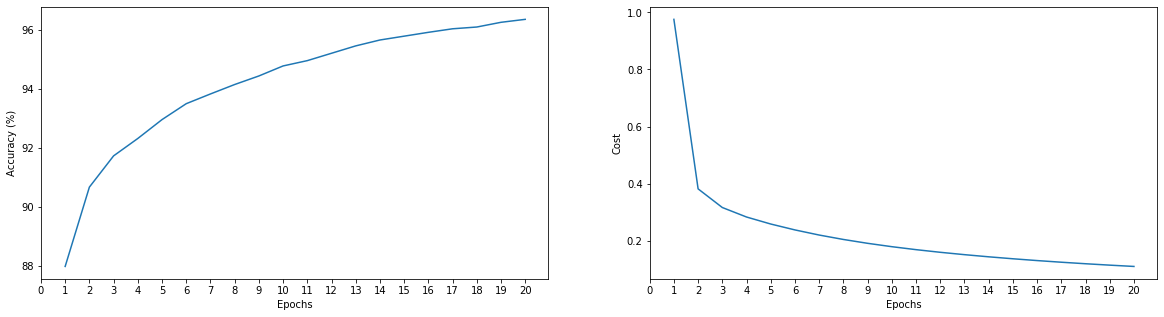

In [29]:
plt.figure(figsize=(20, 5))

# 正解率のグラフ
plt.subplot(1, 2, 1)
plt.plot(range(1, len(mnist_classifier.accuracies) + 1), mnist_classifier.accuracies * 100)
plt.xticks(np.arange(0, len(mnist_classifier.accuracies) + 1, 1))
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# コストのグラフ
plt.subplot(1, 2, 2)
plt.plot(range(1, len(mnist_classifier.costs) + 1), mnist_classifier.costs)
plt.xticks(np.arange(0, len(mnist_classifier.costs) + 1, 1))
plt.xlabel('Epochs')
plt.ylabel('Cost')

# 表示
plt.show()